# First Neuronal Network
---
### In this lesson you'll learn:

- how one-hot encoding works.
- how to program a simple neural net in Python.
---

Before we train the net, the first thing we need to do is load the libraries and functions we need.

In [22]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Activation functions


In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # np.exp() = e^()

def softmax(x, axis=1):
    return np.exp(x) / np.sum(np.exp(x), axis=axis, keepdims=True)

### One-hot encoding

We want the labels to be a vector of zeros and ones rather than a simple number. See below:<br>
<center>
0  =  [1 0 0 0 0 0 0 0 0 0]<br>
1  =  [0 1 0 0 0 0 0 0 0 0]<br>
2  =  [0 0 1 0 0 0 0 0 0 0]<br>
3  =  [0 0 0 1 0 0 0 0 0 0]<br>
4  =  [0 0 0 0 1 0 0 0 0 0]<br>
5  =  [0 0 0 0 0 1 0 0 0 0]<br>
usw. <br>
9  =  [0 0 0 0 0 0 0 0 0 1]<br>
</center>

The 'one-hot' function does just that.

In [34]:
def one_hot(labels):
    one_hot_matrix = np.zeros(
        [
            len(labels),
            len(set(labels))
        ]
    )
    for i,x in enumerate(labels):
        one_hot_matrix[i,x] = 1
    return one_hot_matrix

In [24]:
# Scales the original images, which can have values between 0 and 255, to images with values between 0 and 1.
# This allows neural networks to be better trained.
def min_max(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

### Load data

We can easily read the required data with `numpy`. The training data `mnist_train.csv` contains images and their labels. The images have already been transformed from a matrix to a vector.<br>
<center>
<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png" style="width: 800px;">
</center>

The data set can also be viewed externally. To do this, simply click on the folder `data` in the left column (depending on the Jupyter version) and then on the file `mnist_train.csv`. The first column of each data set contains the labels. In each row there is an image, furthermore each column (except the first one) has the values of a specific pixel assigned to it.

With `np.genfromtxt()` arrays can be created from `.txt` files in Python. 


In this example, the labels or targets are in the first column, not the last.


In [25]:
train_data = np.genfromtxt('../data/mnist/mnist_train.csv', delimiter=',', skip_header =False) 
# genfromtxt reads .txt files, setting delimiter ="," allows to read .csv (comma seperated values) files.
test_data=np.genfromtxt('../data/mnist/mnist_test.csv', delimiter=',', skip_header =False) 
# Here we load the test data.

# After we have imported the data, we divide the data into images and labels.
# We also convert labels from float to integer with .astype(int).
train_labels=train_data[:,0].astype(int) 
train_images = train_data[:,1:]

test_labels=test_data[:,0].astype(int)
test_images = test_data[:,1:]

del train_data, test_data # for more memory we delete original data

We have now read in the training dataset. With `train_images.shape` you can see that the variable `train_images` is a 60000 x 784 matrix, so it has 60000 rows and 784 columns. Each row is an image and each column is a pixel. The original images were 28 x 28 pixels. In the next step we use the *function* `one_hot` to code the labels correctly.

In [26]:
train_images.shape

(60000, 784)

In [33]:
train_targets=one_hot(train_labels)
test_targets = one_hot(test_labels)

train_targets[:5,:] # the labels of the first five images

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Finally, we have to use the `min_max` scaler to scale the pixel values between zero and one.

In [35]:
train_images = min_max(train_images)
test_images = min_max(test_images)

In the following cell you can see an example image. The function `.reshape([28,28])` will change the image back to its original form. This way you can really see the image.

Correct Label: 5


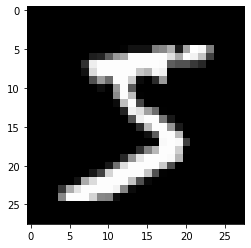

In [36]:
plt.imshow(train_images[0].reshape([28, 28]), cmap="gray")
print("Correct label: %s" % train_labels[0])

### The model


**Initializing the weights**

First, the weight and bias matrices/vectors must be created with the correct dimensions. For this purpose we'll write a function. In it we have to define the size of the respective layers (`input_size`, `hidden_size`, `output_size`). With these you can create the weight matrices. While the `b` vectors can be filled with zeros, the weights matrices must be initialized with random small numbers.


The function `np.random.randn(number_of_rows, number_of_columns)` puts random values between minus one and one into the matrix. Additionally the term `*np.sqrt(2/layer_size)` is added. This reduces the values even more and should guarantee a better training of the network. 

In the following code you should enter the correct matrix sizes (number of rows/columns). The input matrix `X` has 60000 rows and 784 columns and for a matrix multiplication the number of columns of the first matrix must match the number of rows of the second matrix.
Also remember that we will use the transpose of the weight matrix.

The bias `b` is initialized with zeros. `np.zeros(500)` would fill a vector of length 500 with zeros.
Also, we do not need to mention the actual numbers, but only the names of the input variables, so not 784, but `input_size`.
The actual values can then be defined when actually using the function.


In [ ]:
# function initializing the weights
def init_weights(input_size, hidden_size, output_size):
    # two empty lists with a lenght of two
    b = [0] * 2
    W = [0] * 2

    # here the weights W are initialized with small, random numbers
    
    W[0] = np.random.randn(        ,         ) * np.sqrt(2 / input_size)  # WRITE THE CORRECT SIZES HERE
    W[1] = np.random.randn(        ,         ) * np.sqrt(2 / hidden_size) # WRITE THE CORRECT SIZES HERE

    # the bias can be zero
    b[0] = np.zeros(       ) # WRITE THE CORRECT SIZES HERE
    b[1] = np.zeros(       ) # WRITE THE CORRECT SIZES HERE


    return W, b

<details>
<summary><strong>Solution:</strong></summary>

```python
def init_weights(input_size, hidden_size, output_size):
    # two empty lists with a lenght of two
    b = [0] * 2
    W = [0] * 2

    # here the weights W are initialized with small, random numbers
    
    W[0] = np.random.randn(hidden_size,input_size) * np.sqrt(2 / input_size)  
    W[1] = np.random.randn(output_size,hidden_size) * np.sqrt(2 / hidden_size) 

    # the bias can be zero
    b[0] = np.zeros(hidden_size) 
    b[1] = np.zeros(output_size) 


    return W, b
```
</details>

The weights can now be initialized: 

The input size is predefined, since each image has 784 pixels. The output size is also predefined, since the net must distinguish between 10 different digits.
The only value you can set yourself is the size of the hidden layers. There is no simple rule for the size, but if it is too small, it can reduce the accuracy of the neural network. If it is too large, the network will train too slowly and may become unstable. This can also affect the accuracy. Try values like 100 or 200 in the beginning. 

Parameters like the size of the hidden layers or the learning rate, which you can freely choose, are called **hyper parameters**. Unlike the actual weights of the net, these are not optimized by the backpropagation. This has to be done "by hand". This process is called hyperparameter optimization.

With this function you can now initialize the weights. The function outputs two lists `W` and `b`. The two lists contain two matrices/vectors each, one for the first and one for the second transformation.


In [37]:
W, b = init_weights(input_size=784, hidden_size=200,output_size= 10)

NameError: name 'init_weights' is not defined

In [ ]:
W[0].shape

If you initialized the weights correctly, `W[0].shape` should be `(200,784)`.

---

You may ask: Why don't we just initialize our weights with ` W[0] = np.random.randn(input_size,hidden_size)`. Then we wouldn't need to use `.transpose()` later, since the matrices already have the correct format.

Indeed, this is possible, but this way of initialization has become the standard. To avoid future confusion, we follow this standard as well. 

---

**Forward pass** 

After the weights have been initialized, you can perform the forward pass of the network. The images are sent through the network, which as the last step classifies these images.
The function `forward_pass()` does just that. Its input is:

* `W`: list of weight matrices
* `b`: list of bias vectors
* `X`: input matrix of images 



First $Z_1 = xW_1^T+b_1$ is calculated. <br>
Then $A_1= sigmoid(Z_1)$.

<br>
This is how the activations for the hidden layers are calculated. For the final classification, the values must be transformed a second time:<br>
$\hat{Y} = softmax(A_1W_2^T+b_2)$

The function outputs three variables at the end:
* `Z_1`: the values of the first linear transformation
* `A_1`: the values after the first activation function
* `Y_hat`: the values of the output layer 


*Remember that the weights of the first layers are not stored in* `W[1]` *but in* `W[0]`*, because the indexing starts at zero and not at one.*

*Remember also that for matrix multiplication we use* `np.matmul` *and no longer* `np.dot`.

In [ ]:
def forward_pass(W, b, X):
    
    Z_1 = # CODE TO CALCULATE Z_1 
    A_1 = # CODE TO CALCULATE A_1 
    Z_2 = # CODE TO CALCULATE Z_2 
    Y_hat = #CODE TO CALCULATE Y_HAT 
    return Z_1, A_1, Y_hat

<details>
<summary><strong>Solution:</strong></summary>

```python
def forward_pass(W, b, X):
    
    Z_1 = np.matmul(X,W[0].transpose())+b[0] 
    A_1 = sigmoid(Z_1) 
    Z_2 = np.matmul(A_1,W[1].transpose())+b[1] 
    Y_hat = softmax(Z_2) 
    return Z_1, A_1, Y_hat
```
</details>

### Loss funktion

After the forward pass, the loss is calculated. It measures how well or poorly the model was able to recognize the numbers in the images.

For this only the values of the output layer (`y_hat`) and the true values (`y`) are used. The true values were created before with the function `one_hot` and are stored in the variable `train_targets`. 

You have already learned about the Binary Crossentropy Loss, which is used for binary classification. This loss function is just a special version of the Crossentropy Loss, which can be used for the classification of more than two classes. Since we are now trying to distinguish ten different numbers, we will continue with the more general Crossentropy Loss. 

The exact loss function is given here: 


In [ ]:
def calc_loss(y_hat, y):
    return -np.sum(np.log(y_hat) * y)

You can now use the first three functions together to perform your first classification.
Remember that the `train_images` are the input to the network. We want the hidden layer to have 300 nodes.

In [ ]:
np.random.seed(1234) # A seed is set so that the results of the random initialization are the same for all participants.
W, b = # CODE TO INITIALIZE THE WEIGHTS

# Use the train_images as X (input)
Z_1, A_1, Y_hat = # CODE FOR THE FORWARD PASS

# Here you calculate the loss
calc_loss(           ,           )/Y_hat.shape[0]

<details>
<summary><strong>Solution:</strong></summary>

```python
np.random.seed(1234)
W, b = init_weights(784,300,10)

# Use the train_images as X (input)
Z_1, A_1, Y_hat = forward_pass(W,b,train_images)
    
# Here you calculate the loss
calc_loss(Y_hat,train_targets)/Y_hat.shape[0]
    
```
</details>

We additionally calculate the accuracy to get better overview of how well our model works.


In [38]:
def accuracy(true_labels,predicted):
    pred_labels = np.argmax(predicted, axis=1) # argmax returns the index of the maximum value
    correct_predicted = np.sum(true_labels == pred_labels)
    return correct_predicted /correct_predicted.shape[0]

In [39]:
accuracy(train_labels,Y_hat)

NameError: name 'Y_hat' is not defined

Currently, the network has an accuracy of 10.3%. An accuracy of 10% can be expected if the network decides randomly.
To achieve a better accuracy above 10%, you have to train the network or change the weights. Use the backpropagation for this purpose.

**Backpropagation**

The errors in the classification are now fed back through the network, and based on the gradients, the weights are adjusted.

* $dZ_2 = \hat{y} - y$ 
* $dW_2 = \frac{1}{n} \cdot dZ_2^Ta_1$
* $db_2 = \frac{1}{n} \cdot \sum_{i=1}^n dZ_2$
* $dZ_1 = dZ_2W_2 \cdot a_1 \cdot (1-a_1)$
* $dW_1 = \frac{1}{n} \cdot dZ_1^TX$
* $db_1 = \frac{1}{n} \cdot\sum_{i=1}^n dZ_1$

How the gradients are mathematically obtained is beyond the scope of these exercises. For the concrete application in later exercises, there are libraries that can calculate the gradients automatically. For the moment, however, we calculate the gradients ourselves.

In [ ]:
def back_prop(X, Z_1, A_1, Y_hat, y):
    n = X.shape[0] # n is the number of images
    
    # Gradients for the weights of the second layer
    dZ_2 =  # CODE TO CALCULATE dZ_2
    dW_2 =  # CODE TO CALCULATE dW_2
    db_2 = np.sum(dZ_2, axis=0) / n
    
    # Gradients for the weights of the first layer
    dZ_1 = np.multiply(np.matmul(dZ_2, W[1]), np.multiply(A_1, 1 - A_1))
    dW_1 = # CODE TO CALCULATE dW_1
    db_1 = # CODE TO CALCULATE db_1

    return [dW_1, dW_2], [db_1, db_2] # Here again two lists are returned, in each of the lists are the gradients for W_1,W_2 and b_1 and b_2.

<details>
<summary><strong>Solution:</strong></summary>

```python
def back_prop(X, Z_1, A_1, Y_hat, y):
    n = X.shape[0] # n is the number of images

    # Gradients for the weights of the second layer
    dZ_2 = Y_hat - y
    dW_2 = np.matmul(dZ_2.transpose(), A_1) / n
    db_2 = np.sum(dZ_2, axis=0) / n
    
    # Gradients for the weights of the first layer
    dZ_1 = np.multiply(np.matmul(dZ_2, W[1]), np.multiply(A_1, 1 - A_1))
    dW_1 = np.matmul(dZ_1.transpose(), X) / n
    db_1 = np.sum(dZ_1, axis=0) / n

    return [dW_1, dW_2], [db_1, db_2] 
```
    
</details>

### Update the weights

In the last step, the weights are adjusted. For this purpose, the weights are shifted a little against the gradient. 
How far exactly depends on the learning rate `lr`. The larger the learning rate, the larger the steps.
If the learning rate is too small, the training may take too long or the mesh may get stuck in a local minimum. If the learning rate is too large, the loss of the network jumps too much, so optimal performance cannot be guaranteed.
The learning rate, like the size of the hidden layers, is a hyperparameter.
<center>
<img src="https://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_learning_rate.png" style="width: 800px;">
<h8><center>Source: Sebastian Raschka, https://sebastianraschka.com</center></h8>
</center>

In [ ]:
def update(W, b, grad_W, grad_b, lr=0.0001):
    W[0] = # CODE FOR W[0]
    W[1] = # CODE FOR W[1]
    b[0] = # CODE FOR b[0]
    b[1] = # CODE FOR b[1]

    return W, b # the function returns the new weights and biases (2 listn)

<details>
<summary><strong>Solution:</strong></summary>

```python
def update(W, b, grad_W, grad_b, lr=0.0001):
    W[0] = W[0] - lr * grad_W[0]
    W[1] = W[1] - lr * grad_W[1]
    b[0] = b[0] - lr * grad_b[0]
    b[1] = b[1] - lr * grad_b[1]

    return W, b # the function returns the new weights and biases (2 listn)
```
    
</details>



## Putting it all together

Now you can put everything together. First you initialize the weights, then the input is passed through the network and the loss is calculated.  Then the loss is passed back through the net and the gradients are calculated. Using the gradients, the weights are updated. For the learning rate use the value 0.1.

In [ ]:
# 1.INITIALIZE WEIGHTS
np.random.seed(1234) 
W, b = init_weights(input_size=784, hidden_size=300,output_size= 10) 

# 2.FORWARD PROPAGATION
Z_1, A_1, Y_hat = forward_pass(W,b,train_images)

# 3.CALCULATE LOSS
print("Loss after first pass:",calc_loss(Y_hat,train_targets)/Y_hat.shape[0], "\nAccuracy after first pass:", accuracy(train_labels, Y_hat) )

# 4. BACKPROPAGATION
grad_W, grad_b = # CODE FOR BACKPROPAGATION

# 5. UPDATE WEIGHTS
W, b = # NEW WEIGHTS

<details>
<summary><strong>Solution:</strong></summary>

```python
# 1.INITIALIZE WEIGHTS
np.random.seed(1234) 
W, b = init_weights(input_size=784, hidden_size=300,output_size= 10) 

# 2.FORWARD PROPAGATION
Z_1, A_1, Y_hat = forward_pass(W,b,train_images)

# 3.CALCULATE LOSS
print("Loss after first pass:",calc_loss(Y_hat,train_targets)/Y_hat.shape[0], "\nAccuracy after first pass:", accuracy(train_labels, Y_hat) )

# 4. BACKPROPAGATION
grad_W, grad_b = back_prop(train_images, Z_1, A_1, Y_hat, train_targets)

# 5. UPDATE WEIGHTS
W, b = update(W, b, grad_W, grad_b, lr = 0.1)
```
    
</details>



The Loss and Accuracy are still unchanged. Only when you send the input through the network again, you can see the effect of the updated weights.

In [ ]:
Z_1, A_1, Y_hat = forward_pass(W,b,train_images)

# now calculate the loss
print("Loss after the second pass:",calc_loss(Y_hat,train_targets)/Y_hat.shape[0], "\nAccuracy after the second pass:", accuracy(train_labels, Y_hat) )

In fact, the loss decreases and the accuracy improves. However, short-term deterioration may also occur during training, but this is not a big deal.  The effect of the training often becomes visible only after several epochs. You can simply repeat the training step.
To do this more efficiently, simply write a `for-loop`:

In [ ]:
# 1.INITALIZE WEIGHTS 
np.random.seed(1234)
W, b = init_weights(784, 300, 10)

EPOCHS= 50 # how often the data is passed through the network
for i in range(EPOCHS):
    
    # 2. FORWARD PROPAGATON
    Z_1, A_1, Y_hat = forward_pass(W, b,train_images)
    
    # 3. CALCULATE LOSS
    loss = calc_loss(Y_hat, train_targets) / Y_hat.shape[0]
    acc = accuracy(train_labels, Y_hat)
    
    print(i, 
        "Training Loss: %.2f Training Accuracy: %.2f"
        % (loss, acc)
    )
    
    # 4. BACK PROPAGATION
    grad_W, grad_b = back_prop(train_images, Z_1, A_1, Y_hat, train_targets)
    
    # 5. UPDATE WEIGHTS
    W, b = update(W, b, grad_W, grad_b, lr = 0.1)

You can already see an improvement and achieve an accuracy of 73%. However, the training takes a long time. With a higher learning rate, the training should be faster. Try a learning rate of 0.3.

In [ ]:
np.random.seed(1234)
W, b = init_weights(784, 300, 10)
loss= []
EPOCHS= 50 # how often the data is passed through the network
for i in range(EPOCHS):
    Z_1, A_1, Y_hat = forward_pass(W, b,train_images)
    
    loss= calc_loss(Y_hat, train_targets) / Y_hat.shape[0]
    
    acc = accuracy(train_labels, Y_hat)
    
    print(i,
        "Training Loss: %.2f Training Accuracy: %.2f"
        % (loss, acc)
    )
    
    # BACK PROPAGATION
    grad_W, grad_b = back_prop(train_images, Z_1, A_1, Y_hat, train_targets)
    
    # UPDATE WEIGHTS
    W, b = update(W, b, grad_W, grad_b, lr = 0.3 )

With a learning rate of 0.3, you achieve an accuracy of 78% after 50 epochs. You can improve the net even further by training for even longer. 

What would you need to change in the code to train for 25 more epochs **without having to train the net again from the beginning**?

In [ ]:
np.random.seed(1234)
W, b = init_weights(784, 300, 10)
loss= []
EPOCHS= 25 # how often the data is passed through the network
for i in range(EPOCHS):
    Z_1, A_1, Y_hat = forward_pass(W, b,train_images)
    loss= calc_loss(Y_hat, train_targets) / Y_hat.shape[0]
    acc = accuracy(train_labels, Y_hat)
    print(
        "Training Loss: %.2f Training Accuracy: %.2f"
        % (loss, acc)
    )
    
    # BACK PROPAGATION
    grad_W, grad_b = back_prop(train_images, Z_1, A_1, Y_hat, train_targets)
    # UPDATE WEIGHTS
    W, b = update(W, b, grad_W, grad_b, lr = 0.3)

<details>
<summary><strong>Solution:</strong></summary>

```python
np.random.seed(1234)
# W, b = init_weights(784, 300, 10) # Simply do not initialize the weights again.
loss= []
EPOCHS= 25 # how often the data is passed through the network
for i in range(EPOCHS):
    Z_1, A_1, Y_hat = forward_pass(W, b,train_images)
    loss= calc_loss(Y_hat, train_targets) / Y_hat.shape[0]
    acc = accuracy(train_labels, Y_hat)
    print(
        "Training Loss: %.2f Training Accuracy: %.2f"
        % (loss, acc)
    )
    
    # BACK PROPAGATION
    grad_W, grad_b = back_prop(train_images, Z_1, A_1, Y_hat, train_targets)
    # UPDATE WEIGHTS
    W, b = update(W, b, grad_W, grad_b, lr = 0.3)
```
    
</details>



You simply must not reinitialize the weights. Otherwise, everything that the net has already learned will be lost.

With further training, you have been able to improve the mesh by 6% Accuracy. Basically, you still have the option to change something about the size of the hidden layers. 

Before we do that, you can first see how well our model works on images it hasn't seen yet. We are talking about the test dataset here. For this purpose, the test set is fed into the trained network:

In [40]:
_, _, test_y_hat = forward_pass(W, b, test_images) # by using underscores, z_1 and a_1 aren't returned, we don't need them
accuracy(test_labels, test_y_hat)   

NameError: name 'forward_pass' is not defined

The accuracy for the test data set is also 85%. Or: 85 % of the images were recognized correctly.
It is unusual for networks to perform better or equally well on the test data set. This is an indication that you have not trained the model long enough.

Next, you can look at which images the network has the most trouble with.
The code in the next cell sorts the misrecognized images by their probability (this code is not necessarily easy to understand, but it is not essential to understanding neural networks either):

In [41]:
false_classification = np.where(test_labels != np.argmax(test_y_hat, axis=1))[0]# which images were falsly classified
len(false_classification) # this many images were falsly classified

NameError: name 'test_y_hat' is not defined

In [ ]:
# Model-probabilities that the image was correctly classified
probs = [] 
for image in false_classification:
    probs.append(test_y_hat[image,test_labels[image]])

In [ ]:
# We sort the images based on the probabilities, the smaller the probability 
# the more certain the model was that the image is not in the right category.
false_classification=false_classification[np.argsort(probs)]

In [ ]:
# this is what 10 images look like that are misclassified
for i in range(10):
    plt.imshow(test_images[false_classification[i]].reshape([28, 28]), cmap="gray")
    plt.show()
    print(
        "Predicted Label: %s, Correct Label %s"
        % (
            np.argmax(test_y_hat, axis=1)[false_classification[i]],
            test_labels[false_classification[i]],
        )
    )

With some images, you can clearly see why they were categorized incorrectly. With others, however, it is quite easy for the human eye to recognize the correct digit, but the network has problems with it.

# Practice Exercise

Rewrite the above code so that both Test Accuracy and Test Loss are calculated and output after each epoch. This should happen in addition to the training Accuracy/Loss.

In [ ]:
np.random.seed(1234)
W, b = init_weights(784, 300, 10)
loss= []
EPOCHS= 25 # how often the data is passed through the network
for i in range(EPOCHS):
    z_1, a_1, y_hat = forward_pass(W, b,train_images)
    loss= calc_loss(y_hat, train_targets) / y_hat.shape[0]
    acc = accuracy(train_labels, y_hat)
    print(
        "Training Loss: %.2f Training Accuracy: %.2f"
        % (loss, acc)
    )
    
    # backpropagation
    grad_W, grad_b = back_prop(train_images, z_1, a_1, y_hat, train_targets)
    # with the gradients we update the weights
    W, b = update(W, b, grad_W, grad_b, lr = 0.3)